In [1]:
#installation des packages nécéssaires
!pip install langdetect 
!pip install wordcloud
!pip install nltk
!pip install  gensim
!pip install vaderSentiment
!pip install textblob
!pip install vaderSentiment-fr
!pip install deep-translator
!pip install yellowbrick

In [2]:
# Importation des packages utiles
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from langdetect import detect # pour detecter les langues
from wordcloud import WordCloud # pour gerer les nuages de mots
import sklearn as sk
from deep_translator import GoogleTranslator 



In [3]:
#stopword français
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 

# stopword anglais
import gensim 
from gensim.parsing.preprocessing import STOPWORDS 


#from gensim import corpora

from PIL import Image # pour personaliser la forme du wordcloud

# pour analyser les sentiments
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SenEN
analyzer = SenEN()

#pour les top_10 des mots les plus fréquents
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

[nltk_data] Downloading package stopwords to C:\Users\TALEB AHMED
[nltk_data]     Rajaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\TALEB AHMED
[nltk_data]     Rajaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\TALEB AHMED
[nltk_data]     Rajaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
df = pd.read_csv(r'Database.csv', )
df

,Country,rating,contract,is_employed,job,city,date,comment
0,France,3.0,cdd,False,Conseillère clientèle,Massy (91),2022,"Bonne équipe, dommage que la direction soit bl..."
1,France,5.0,NaN,False,Responsable,Falaise,2022,"Équipe au top, l'esprit d'équipe fait la force..."
2,France,4.0,NaN,False,Compliance Officer,Nanterre (92),2022,"bonne ambiance, bonne équipe, bon relationnel,..."
3,France,5.0,NaN,False,Assistante administrative,Saint-Dié-des-Vosges (88),2022,"Missions variées, solidarité dans l’équipe et ..."
4,France,4.0,NaN,False,Chargée de communication,La Défense (92),2022,Première expérience professionnelle durant 3 a...
...,...,...,...,...,...,...,...,...
2515,Indie,4.0,NaN,True,Business Analyst,"Bangalore, KA",2012,A good working environment with good work-life...
2516,Indie,5.0,NaN,True,Auditor,Mumbai,2012,"SA 8000, EMS & Social Audits\r\nBPP Audits in ..."
2517,Indie,5.0,NaN,False,Software Engineer,"Bangalore, KA",2012,nice banking bussiness. had a great time worki...
2518,Indie,5.0,NaN,False,Software Engineer,"Bangalore, KA",2012,This is a euro bank and i had great fun in lea...


# Distribution par colonnes

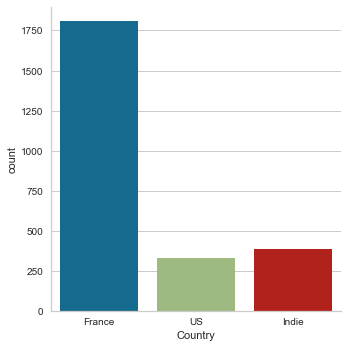

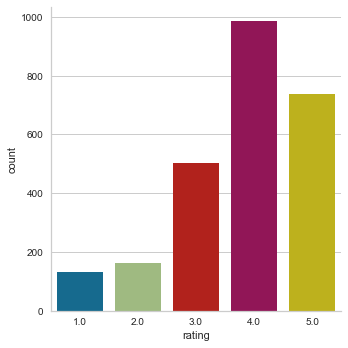

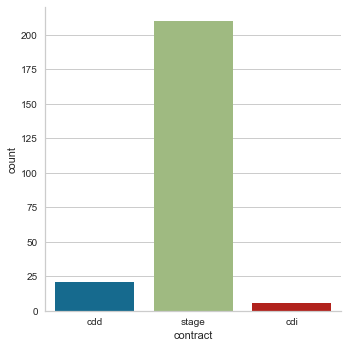

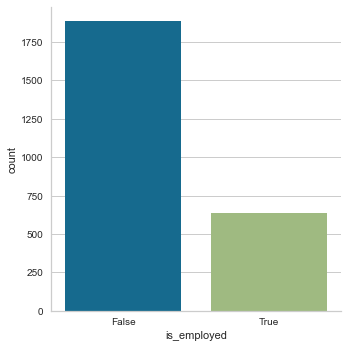

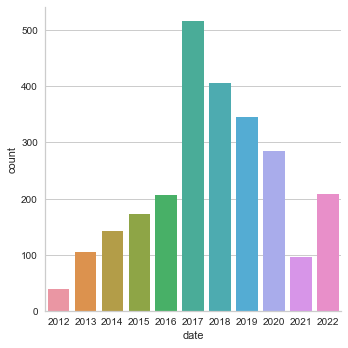

In [5]:
for col in ['Country', 'rating', 'contract', 'is_employed', 'date']:
    sns.catplot(data=df, x=col, kind='count')
    plt.show()

## Distribution des top ten Cities

<AxesSubplot:>

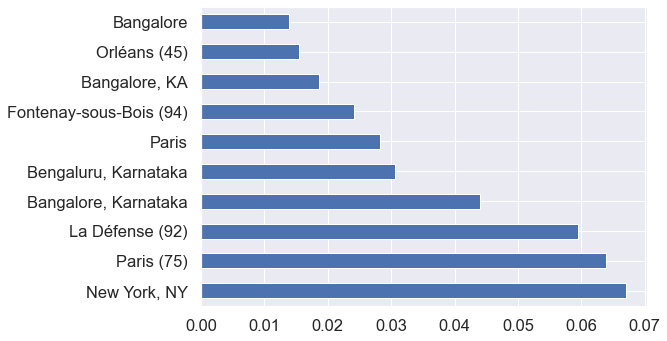

In [6]:
# strip les espaces de la colonne city
# Todo: faire cela dans le scrapping

df['city'] = df['city'].apply(lambda x: str(x).strip(' '))

sns.set_theme(font_scale=1.5)
cities = df['city'].value_counts(normalize=True)
top_cities = cities.nlargest(10)
top_cities.plot(kind='barh', legend=False)

# Distribution des Ratings

## Rating: anciens employés vs employé actuelles

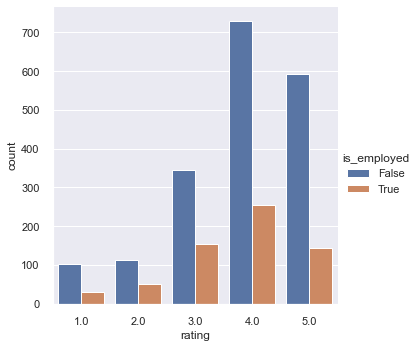

In [7]:
sns.set_theme(font_scale=1)
sns.catplot(data=df, x='rating', hue='is_employed', kind='count')

## Rating: Contrat

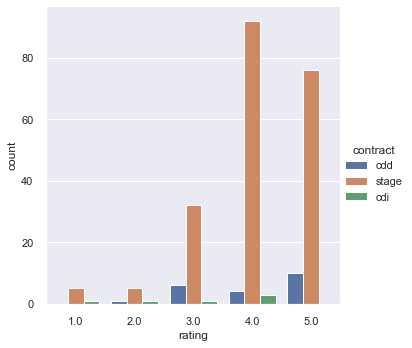

In [8]:
sns.catplot(data=df, x='rating', hue='contract', kind='count')

## Rating: pays

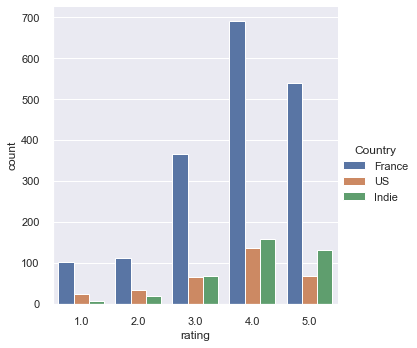

In [9]:
sns.catplot(data=df, x='rating', hue='Country', kind='count')

## Ratings: top10 villes

<AxesSubplot:xlabel='rating', ylabel='city'>

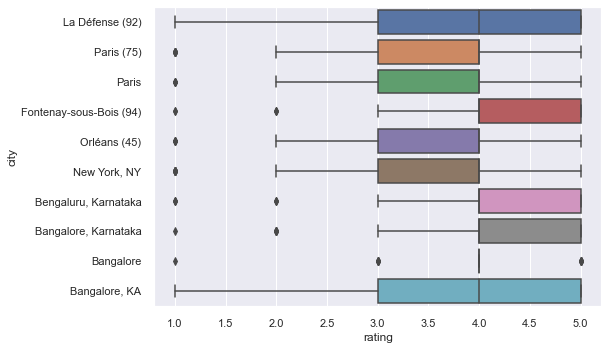

In [10]:
top_cities_index = [city in top_cities.index for city in df['city']]
sub_df = df[top_cities_index]
sns.boxplot(data=sub_df, x='rating', y='city')

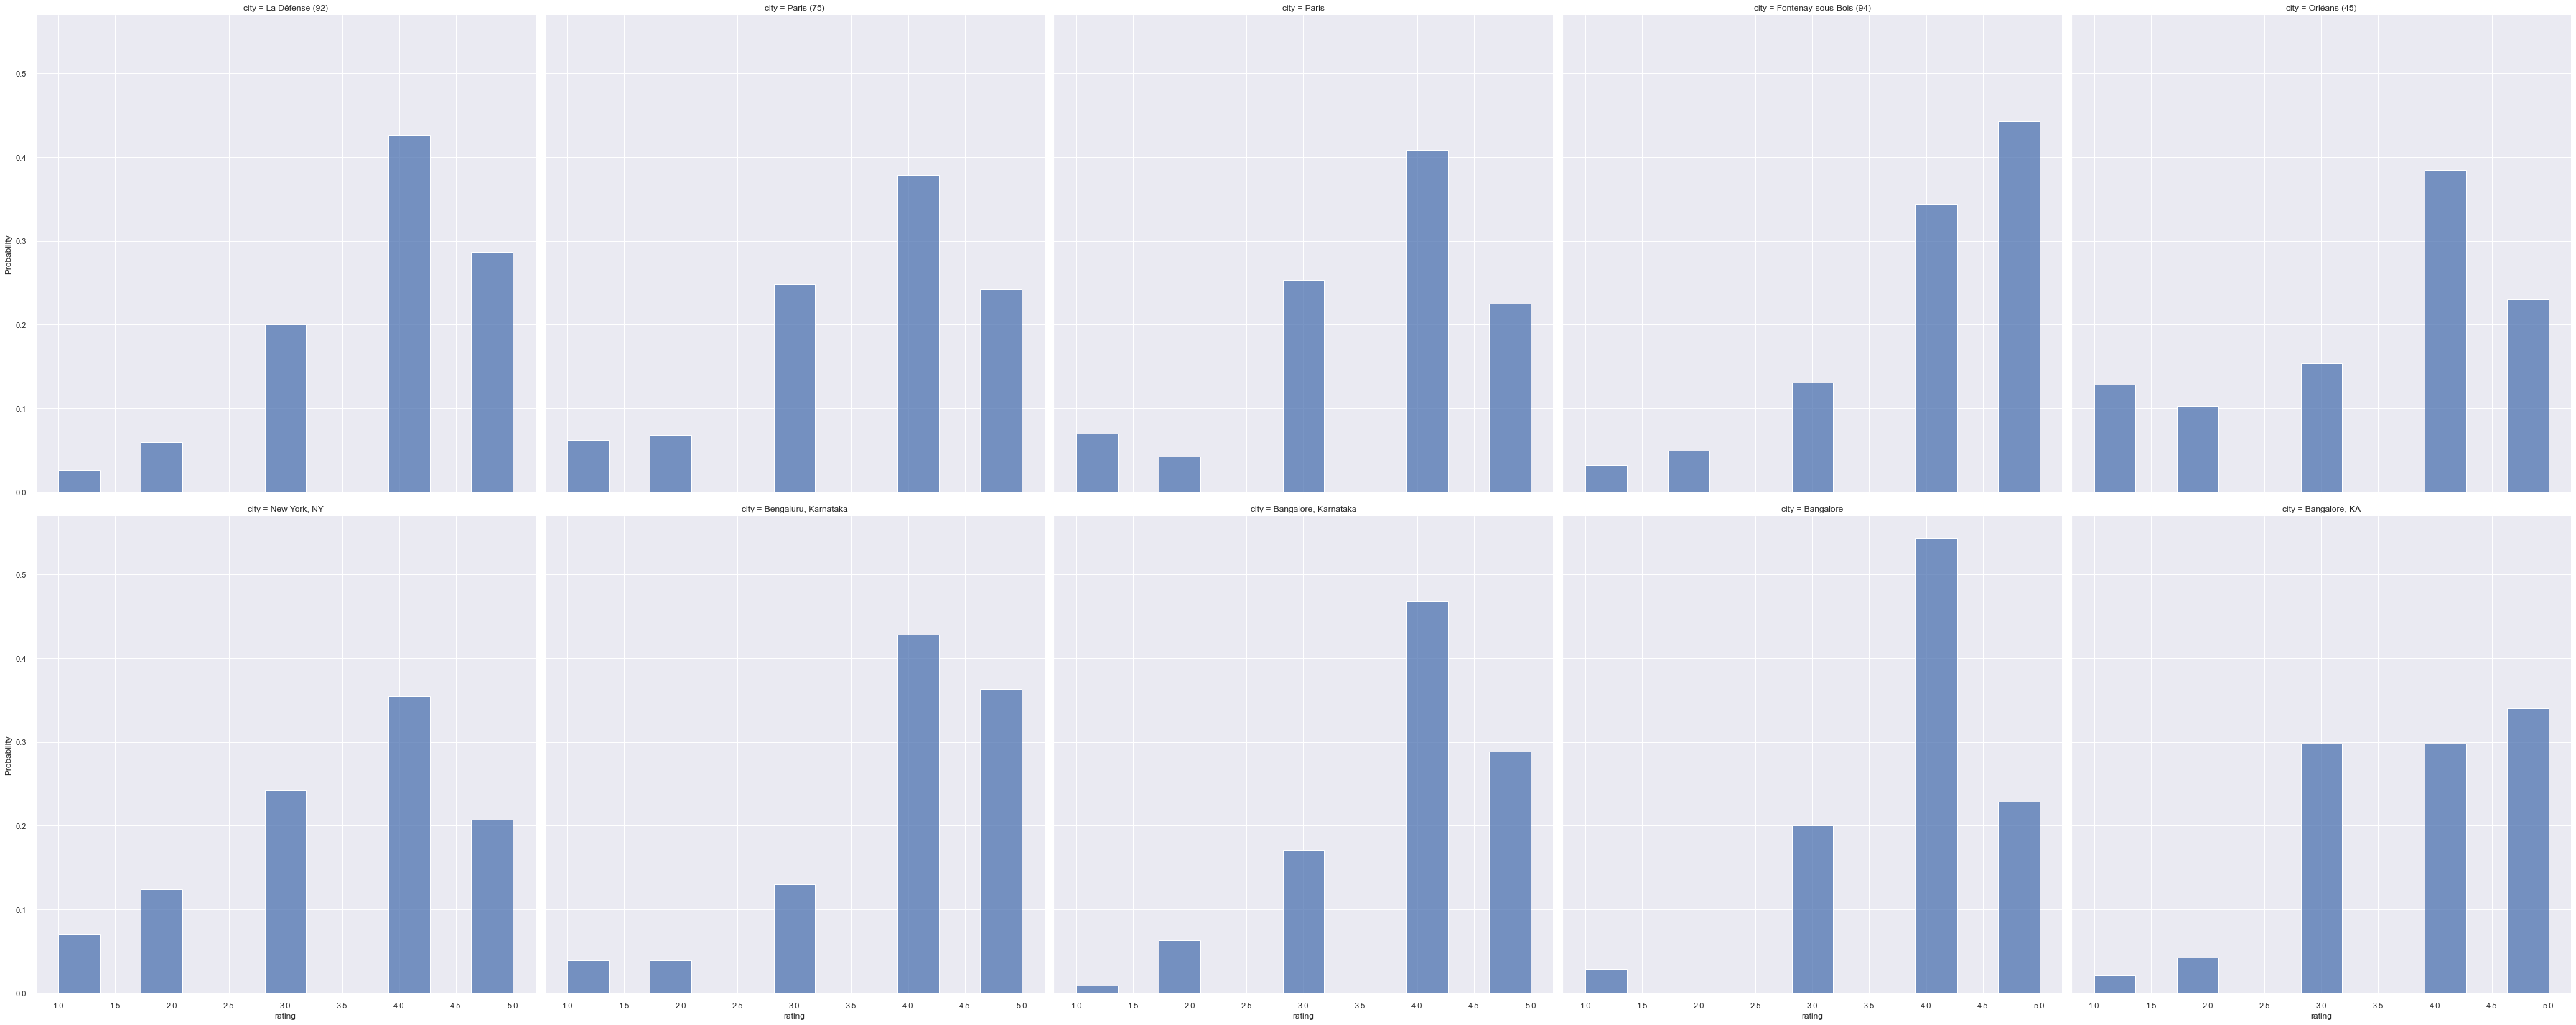

In [11]:
sns.displot(data=sub_df, x='rating', col='city', kind ='hist', height=10, aspect=1, col_wrap=5, stat='probability', common_norm=False)

In [12]:
df_fr=df[df['Country']== 'France']
df_us=df[df['Country']== 'US']
df_in=df[df['Country']== 'Indie']

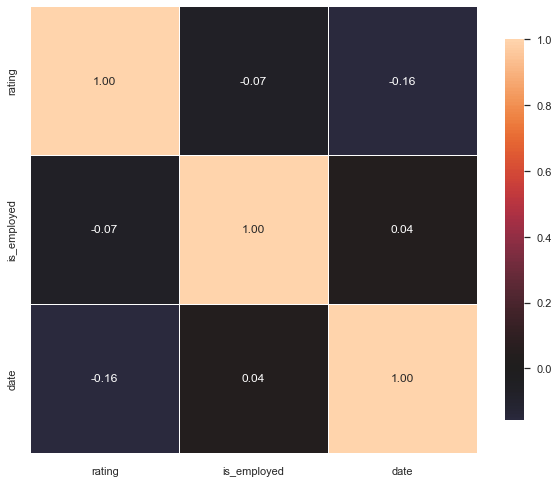

In [13]:
def correlation_heatmap(data):
    correlations = data.corr()
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(df)

In [14]:
dff = df.drop(['Country','rating','contract','is_employed','job','date','city'], axis= 1)
dff_fr = df_fr.drop(['Country','rating','contract','is_employed','job','date','city'], axis= 1)
dff

,comment
0,"Bonne équipe, dommage que la direction soit bl..."
1,"Équipe au top, l'esprit d'équipe fait la force..."
2,"bonne ambiance, bonne équipe, bon relationnel,..."
3,"Missions variées, solidarité dans l’équipe et ..."
4,Première expérience professionnelle durant 3 a...
...,...
2515,A good working environment with good work-life...
2516,"SA 8000, EMS & Social Audits\r\nBPP Audits in ..."
2517,nice banking bussiness. had a great time worki...
2518,This is a euro bank and i had great fun in lea...


In [15]:
def langue(text):
    try:
        return detect(text)
    except:
        return None

In [16]:
dff['langues']=dff['comment'].apply(langue)
print(f"il n'ya que {len(dff.langues.unique())} langues trouvées")
dff['langues'].value_counts()

il n'ya que 7 langues trouvées


fr    1733
en     777
es       5
pt       2
it       1
tr       1
da       1
Name: langues, dtype: int64

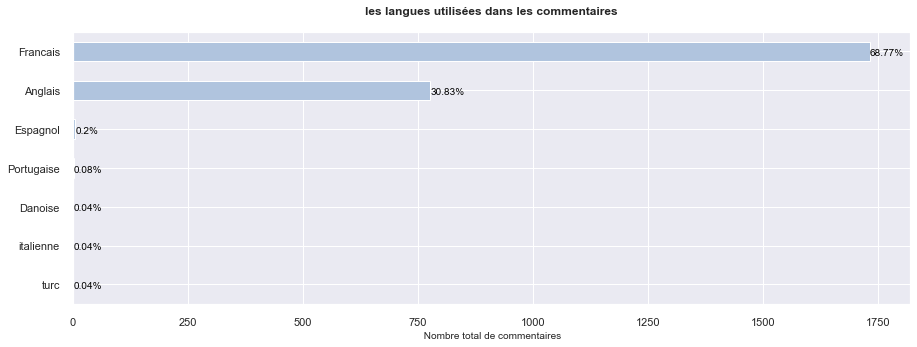

In [17]:
ax=dff['langues'].value_counts().sort_values(ascending=False).plot(kind='barh',figsize=(15,5),color='lightsteelblue')
ax.set_title("les langues utilisées dans les commentaires\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Nombre total de commentaires", fontsize=10)
ax.set_yticklabels(['Francais','Anglais','Espagnol', 'Portugaise','Danoise','italienne','turc'])
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
ax.invert_yaxis()

In [18]:
stop_word_fr = set(stopwords.words('french'))

In [19]:
def plot_wordcloud(df, langue, stop_word_fr):
    wordcloud=WordCloud(max_font_size=None, max_words=500, background_color="white", stopwords=stop_word_fr, random_state=42, width=500, height=500).generate(str(df.values))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.title(langue + ' comment\n', fontsize=25, fontweight='bold')
    plt.show()

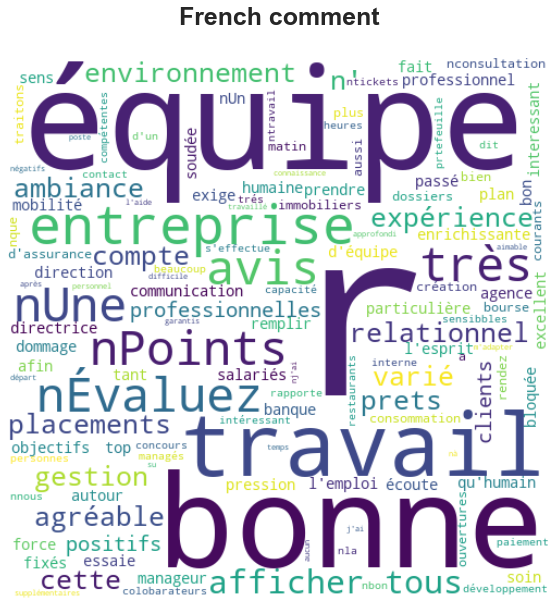

In [20]:
plt.figure(figsize=(12, 10))
plot_wordcloud(dff_fr['comment'], "French",stop_word_fr)
plt.show()

In [21]:
sentiment composé
sentiment positif
sensation neutre
sentiment négatif

SyntaxError: invalid syntax (Temp/ipykernel_16844/4027557164.py, line 1)

In [ ]:
dff_fr['negatif_feeling'] = dff_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
dff_fr['neutral_feeling'] = dff_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
dff_fr['positif_feeling'] = dff_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
dff_fr['compound_feeling'] = dff_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
dff_fr.head()

In [ ]:
dff_fr.shape

In [ ]:
n=0
for i in range(len(dff_fr['negatif_feeling'])):
    if dff_fr['negatif_feeling'][i] == 0.0
    n=n+1
    else :
        n=n

In [ ]:
dff_fr.info()